## Vector and Matrix Norms

### Vector Norms
There exists a norm function in the NumPy Linear algebra submodule numpy.linalg. With this we can calculate the $l_1$, $l_2$ and $l_\infty$ norm of a given vector (i.e. 1-dim np.array)

In [122]:
import numpy as np  
import numpy.linalg as npla 
v = np.array([-4,6,-3])
l1 = npla.norm(v,1)
print('l1 =',l1,'\n')
l2 = npla.norm(v,2)
print('l2 =',l2,'\n')
linf = npla.norm(v,inf)
print('linf =',linf,'\n')

l1 = 13.0 

l2 = 7.810249675906654 

linf = 6.0 



Similar we can calculate the $l_p$ norm from any vector x

In [121]:
x = np.array([1,2,3])
p = 15
lp = npla.norm(v,p)
print('lp =',lp,)

lp = 6.00092467214731


### How does the unit cicle look like in these norms? 

In [92]:
import numpy as np
import matplotlib.pyplot as plt

def UnitCircleInpNorm(p):
    " plot unit circle in p-norm "
    "We sample at 200 point"
    if p == 1: 
        x = np.linspace(0,1,200)
        y = 1 - np.abs(x)
        plt.plot(x,y,x,-y,-x,y,-x,-y)
        plt.axis("equal")
    else:
        phi = np.linspace(0, 2*np.pi, 400)
        x = np.cos(phi)
        y = (1 - np.abs(x)**p)**(1/p) 
        plt.plot(x,y,x,-y,-x,y,-x,-y)
        plt.axis("equal")
    
    plt.show()

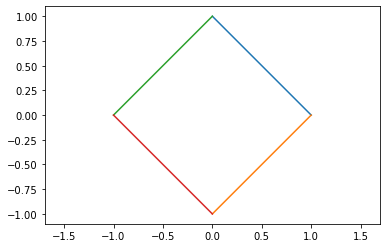

In [95]:
UnitCircleInpNorm(1)

### What about Matrix norms?

In [123]:
A=np.array([[2, 1, 1], [2, 0, 2], [4, 3, 4]])

### Hilbert-Schmidt Norm

In [120]:
HSofA = npla.norm(A)
print('Hilbert-Schmidt-Norm of A =',HSofA)

Hilbert-Schmidt-Norm of A = 7.416198487095663


The Hilbert-Schmidt-Norm is also called Frobeniusnorm. 
Lets check that it behaves as I claimed in the Live-Lecture, i.e. 
$$
\|A\|_{\rm HS} = \|a\|_2
$$
where $a$ is the vector with all the entries of $A$.

In [106]:
a = A.reshape(A.shape[0]*A.shape[1],1)
print(a)

[[2]
 [1]
 [1]
 [2]
 [0]
 [2]
 [4]
 [3]
 [4]]


In [119]:
l2ofa = npla.norm(a,2)
print('l2-norm of a =',l2)
linf = npla.norm(v,inf)

l2-norm of a = 7.416198487095664


Up to a rounding error there are equal:

In [109]:
HSofA - l2ofa

-8.881784197001252e-16

### Nuclear Norm
The nuclear norm is the sum of the singular values.

In [118]:
NucA = npla.norm(A,1)
print('Nuclear norm of A =',NucA)

Nuclear norm of A = 8.0


What singular values are we will learn in Chapter 3 when we talk about eigenvalues of a matrix.

### Operator Norm
The operator norm of a matrix $A$ is the maximal streching factor of $A$. 
$$
    \|A\| = \max_{x\neq 0} \frac{\|Ax\|}{\|x\|}
$$
Obviously we can not easily calculate that for arbitrary matrices.

In the special case of a $mxm$ **diagonal matrix** 
$$
D =
    \begin{pmatrix}
        \lambda_1 \\& \lambda_2 \\
        &&\ddots\\
        &&&\lambda_m\\
    \end{pmatrix}
 $$
    however we have that 
$$
    \|D\| = \max_{1 \leq i \leq m} |\lambda_i| 
$$

#### Example:

In [113]:
D=np.array([[2, 0, 0], [0, -5, 0], [0, 0, 0.5]])
print(D)

[[ 2.   0.   0. ]
 [ 0.  -5.   0. ]
 [ 0.   0.   0.5]]


In [116]:
OpDiaB = npla.norm(D,inf)
print('Operatornorm for diagonal matrix D =',OpDiaB)

Operatornorm for diagonal matrix D = 5.0


#### Note: This only works for diagonal matrices !!!